<Figure size 432x288 with 0 Axes>

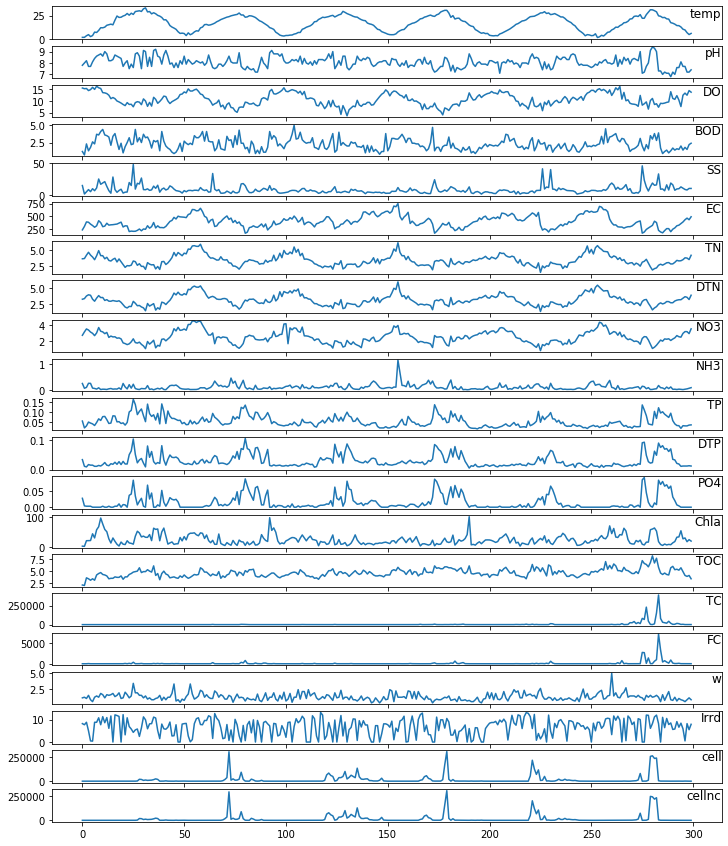

In [30]:
# -*- coding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from datetime import datetime
import matplotlib.pylab as plt


#df = pd.read_csv('C:\WORK_FOCUSED\DeepLearning\Cyano/data_191212nc_nocy.csv',
#               names = ["temp", "pH", "DO", "BOD", "COD", "SS", "EC", "TN", "DTN","NO3", "NH3", 
#                        "TP", "DTP", "PO4", "Chla", "TOC", "TC", "FC", "w", "Irrd", "cell"]) # cyano 불포함 nowcast 
df = pd.read_csv('C:\WORK_FOCUSED\DeepLearning\Cyano/data_191212nc.csv',
               names = ["temp", "pH", "DO", "BOD", "COD", "SS", "EC", "TN", "DTN","NO3", "NH3", 
                        "TP", "DTP", "PO4", "Chla", "TOC", "TC", "FC", "w", "Irrd", "cell", "cellnc"]) # cyano 자신 포함한 nowcast
#df = pd.read_csv('C:\WORK_FOCUSED\DeepLearning\Cyano/data_191212f.csv',
#               names = ["temp", "pH", "DO", "BOD", "COD", "SS", "EC", "TN", "DTN","NO3", "NH3", 
#                        "TP", "DTP", "PO4", "Chla", "TOC", "TC", "FC", "w", "Irrd", "cell", "cellf"]) # cyano 자신 포함한 1 week forecast
#df = pd.read_csv('C:\WORK_FOCUSED\DeepLearning\Cyano/data_191212f_nocy.csv',
#               names = ["temp", "pH", "DO", "BOD", "COD", "SS", "EC", "TN", "DTN","NO3", "NH3", 
#                        "TP", "DTP", "PO4", "Chla", "TOC", "TC", "FC", "w", "Irrd", "cellf"])         # cyano 불포함 1 week forecast




# load dataset
#dataset = read_csv('C:/WORK_FOCUSED/DeepLearning/Cyano/pollution.csv', header=0, index_col=0)
values = df.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7,8,9,10,11,12,13,14,15,16,17,18,19,20,21] # 변수 수에 따라 21 포함 혹은 불포함
#groups = [0, 1, 2, 3, 5, 6, 7,8,9,10,11,12,13,14,15,16,17,18,19,20] # 변수 수에 따라 21 포함 혹은 불포함
i = 1
# plot each column
pyplot.figure()
plt.figure(figsize=(12, 15))
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(df.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [31]:
dataset=df.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
#X=dataset[:,0:21]
#Y_obj=dataset[:,21]
#X = DataFrame(X)
#Y_obj=DataFrame(Y_obj)
#print(X)
#print(Y_obj)
#X=dataset[:,0:20]
#Y_obj=dataset[:,20]
seed=0
#print(X)
#print(Y_obj)
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y_obj, test_size=0.3, random_state=seed)



n_train_weeks = 210
train = dataset[:n_train_weeks, :]
#print(train)
test = dataset[n_train_weeks:, :]
# split into input and outputs
X_train, Y_train = train[:, :-1], train[:, -1]
X_test, Y_test = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(210, 1, 21) (210,) (90, 1, 21) (90,)


Train on 210 samples, validate on 90 samples
Epoch 1/1000
 - 1s - loss: 0.0586 - val_loss: 0.0845
Epoch 2/1000
 - 0s - loss: 0.0519 - val_loss: 0.0729
Epoch 3/1000
 - 0s - loss: 0.0438 - val_loss: 0.0685
Epoch 4/1000
 - 0s - loss: 0.0422 - val_loss: 0.0675
Epoch 5/1000
 - 0s - loss: 0.0403 - val_loss: 0.0651
Epoch 6/1000
 - 0s - loss: 0.0389 - val_loss: 0.0623
Epoch 7/1000
 - 0s - loss: 0.0368 - val_loss: 0.0611
Epoch 8/1000
 - 0s - loss: 0.0359 - val_loss: 0.0608
Epoch 9/1000
 - 0s - loss: 0.0360 - val_loss: 0.0595
Epoch 10/1000
 - 0s - loss: 0.0354 - val_loss: 0.0587
Epoch 11/1000
 - 0s - loss: 0.0344 - val_loss: 0.0585
Epoch 12/1000
 - 0s - loss: 0.0338 - val_loss: 0.0568
Epoch 13/1000
 - 0s - loss: 0.0328 - val_loss: 0.0566
Epoch 14/1000
 - 0s - loss: 0.0325 - val_loss: 0.0553
Epoch 15/1000
 - 0s - loss: 0.0316 - val_loss: 0.0550
Epoch 16/1000
 - 0s - loss: 0.0315 - val_loss: 0.0542
Epoch 17/1000
 - 0s - loss: 0.0305 - val_loss: 0.0536
Epoch 18/1000
 - 0s - loss: 0.0302 - val_loss:

Epoch 152/1000
 - 0s - loss: 0.0044 - val_loss: 0.0068
Epoch 153/1000
 - 0s - loss: 0.0029 - val_loss: 0.0066
Epoch 154/1000
 - 0s - loss: 0.0025 - val_loss: 0.0064
Epoch 155/1000
 - 0s - loss: 0.0031 - val_loss: 0.0073
Epoch 156/1000
 - 0s - loss: 0.0021 - val_loss: 0.0066
Epoch 157/1000
 - 0s - loss: 0.0022 - val_loss: 0.0068
Epoch 158/1000
 - 0s - loss: 0.0038 - val_loss: 0.0073
Epoch 159/1000
 - 0s - loss: 0.0035 - val_loss: 0.0124
Epoch 160/1000
 - 0s - loss: 0.0060 - val_loss: 0.0081
Epoch 161/1000
 - 0s - loss: 0.0046 - val_loss: 0.0071
Epoch 162/1000
 - 0s - loss: 0.0042 - val_loss: 0.0075
Epoch 163/1000
 - 0s - loss: 0.0027 - val_loss: 0.0072
Epoch 164/1000
 - 0s - loss: 0.0026 - val_loss: 0.0062
Epoch 165/1000
 - 0s - loss: 0.0045 - val_loss: 0.0064
Epoch 166/1000
 - 0s - loss: 0.0047 - val_loss: 0.0083
Epoch 167/1000
 - 0s - loss: 0.0024 - val_loss: 0.0089
Epoch 168/1000
 - 0s - loss: 0.0030 - val_loss: 0.0059
Epoch 169/1000
 - 0s - loss: 0.0051 - val_loss: 0.0058
Epoch 170/

Epoch 301/1000
 - 0s - loss: 0.0035 - val_loss: 0.0041
Epoch 302/1000
 - 0s - loss: 0.0022 - val_loss: 0.0042
Epoch 303/1000
 - 0s - loss: 0.0022 - val_loss: 0.0042
Epoch 304/1000
 - 0s - loss: 0.0019 - val_loss: 0.0039
Epoch 305/1000
 - 0s - loss: 0.0015 - val_loss: 0.0033
Epoch 306/1000
 - 0s - loss: 0.0013 - val_loss: 0.0044
Epoch 307/1000
 - 0s - loss: 0.0020 - val_loss: 0.0047
Epoch 308/1000
 - 0s - loss: 0.0020 - val_loss: 0.0049
Epoch 309/1000
 - 0s - loss: 0.0035 - val_loss: 0.0086
Epoch 310/1000
 - 0s - loss: 0.0091 - val_loss: 0.0068
Epoch 311/1000
 - 0s - loss: 0.0060 - val_loss: 0.0062
Epoch 312/1000
 - 0s - loss: 0.0073 - val_loss: 0.0072
Epoch 313/1000
 - 0s - loss: 0.0061 - val_loss: 0.0067
Epoch 314/1000
 - 0s - loss: 0.0081 - val_loss: 0.0065
Epoch 315/1000
 - 0s - loss: 0.0062 - val_loss: 0.0057
Epoch 316/1000
 - 0s - loss: 0.0066 - val_loss: 0.0081
Epoch 317/1000
 - 0s - loss: 0.0078 - val_loss: 0.0043
Epoch 318/1000
 - 0s - loss: 0.0049 - val_loss: 0.0071
Epoch 319/

Epoch 450/1000
 - 0s - loss: 0.0028 - val_loss: 0.0057
Epoch 451/1000
 - 0s - loss: 0.0041 - val_loss: 0.0071
Epoch 452/1000
 - 0s - loss: 0.0039 - val_loss: 0.0073
Epoch 453/1000
 - 0s - loss: 0.0035 - val_loss: 0.0046
Epoch 454/1000
 - 0s - loss: 0.0030 - val_loss: 0.0066
Epoch 455/1000
 - 0s - loss: 0.0046 - val_loss: 0.0056
Epoch 456/1000
 - 0s - loss: 0.0036 - val_loss: 0.0057
Epoch 457/1000
 - 0s - loss: 0.0026 - val_loss: 0.0053
Epoch 458/1000
 - 0s - loss: 0.0027 - val_loss: 0.0059
Epoch 459/1000
 - 0s - loss: 0.0035 - val_loss: 0.0045
Epoch 460/1000
 - 0s - loss: 0.0018 - val_loss: 0.0044
Epoch 461/1000
 - 0s - loss: 0.0014 - val_loss: 0.0043
Epoch 462/1000
 - 0s - loss: 0.0016 - val_loss: 0.0042
Epoch 463/1000
 - 0s - loss: 0.0016 - val_loss: 0.0048
Epoch 464/1000
 - 0s - loss: 0.0023 - val_loss: 0.0041
Epoch 465/1000
 - 0s - loss: 0.0033 - val_loss: 0.0047
Epoch 466/1000
 - 0s - loss: 0.0027 - val_loss: 0.0042
Epoch 467/1000
 - 0s - loss: 0.0018 - val_loss: 0.0045
Epoch 468/

Epoch 599/1000
 - 0s - loss: 0.0027 - val_loss: 0.0035
Epoch 600/1000
 - 0s - loss: 0.0023 - val_loss: 0.0060
Epoch 601/1000
 - 0s - loss: 0.0036 - val_loss: 0.0046
Epoch 602/1000
 - 0s - loss: 0.0020 - val_loss: 0.0033
Epoch 603/1000
 - 0s - loss: 0.0018 - val_loss: 0.0035
Epoch 604/1000
 - 0s - loss: 0.0013 - val_loss: 0.0035
Epoch 605/1000
 - 0s - loss: 0.0022 - val_loss: 0.0046
Epoch 606/1000
 - 0s - loss: 0.0028 - val_loss: 0.0039
Epoch 607/1000
 - 0s - loss: 0.0028 - val_loss: 0.0040
Epoch 608/1000
 - 0s - loss: 0.0025 - val_loss: 0.0037
Epoch 609/1000
 - 0s - loss: 0.0022 - val_loss: 0.0056
Epoch 610/1000
 - 0s - loss: 0.0038 - val_loss: 0.0050
Epoch 611/1000
 - 0s - loss: 0.0029 - val_loss: 0.0038
Epoch 612/1000
 - 0s - loss: 0.0017 - val_loss: 0.0045
Epoch 613/1000
 - 0s - loss: 0.0024 - val_loss: 0.0040
Epoch 614/1000
 - 0s - loss: 0.0020 - val_loss: 0.0036
Epoch 615/1000
 - 0s - loss: 0.0025 - val_loss: 0.0056
Epoch 616/1000
 - 0s - loss: 0.0045 - val_loss: 0.0070
Epoch 617/

Epoch 748/1000
 - 0s - loss: 0.0033 - val_loss: 0.0056
Epoch 749/1000
 - 0s - loss: 0.0029 - val_loss: 0.0047
Epoch 750/1000
 - 0s - loss: 0.0027 - val_loss: 0.0037
Epoch 751/1000
 - 0s - loss: 0.0011 - val_loss: 0.0042
Epoch 752/1000
 - 0s - loss: 0.0018 - val_loss: 0.0046
Epoch 753/1000
 - 0s - loss: 0.0020 - val_loss: 0.0067
Epoch 754/1000
 - 0s - loss: 0.0040 - val_loss: 0.0053
Epoch 755/1000
 - 0s - loss: 0.0028 - val_loss: 0.0055
Epoch 756/1000
 - 0s - loss: 0.0032 - val_loss: 0.0033
Epoch 757/1000
 - 0s - loss: 0.0017 - val_loss: 0.0035
Epoch 758/1000
 - 0s - loss: 0.0014 - val_loss: 0.0040
Epoch 759/1000
 - 0s - loss: 0.0021 - val_loss: 0.0050
Epoch 760/1000
 - 0s - loss: 0.0033 - val_loss: 0.0045
Epoch 761/1000
 - 0s - loss: 0.0014 - val_loss: 0.0043
Epoch 762/1000
 - 0s - loss: 0.0014 - val_loss: 0.0038
Epoch 763/1000
 - 0s - loss: 0.0022 - val_loss: 0.0061
Epoch 764/1000
 - 0s - loss: 0.0049 - val_loss: 0.0069
Epoch 765/1000
 - 0s - loss: 0.0031 - val_loss: 0.0061
Epoch 766/

Epoch 897/1000
 - 0s - loss: 0.0014 - val_loss: 0.0039
Epoch 898/1000
 - 0s - loss: 0.0016 - val_loss: 0.0038
Epoch 899/1000
 - 0s - loss: 0.0024 - val_loss: 0.0046
Epoch 900/1000
 - 0s - loss: 0.0033 - val_loss: 0.0045
Epoch 901/1000
 - 0s - loss: 0.0022 - val_loss: 0.0035
Epoch 902/1000
 - 0s - loss: 0.0020 - val_loss: 0.0042
Epoch 903/1000
 - 0s - loss: 0.0026 - val_loss: 0.0044
Epoch 904/1000
 - 0s - loss: 0.0018 - val_loss: 0.0035
Epoch 905/1000
 - 0s - loss: 0.0015 - val_loss: 0.0043
Epoch 906/1000
 - 0s - loss: 0.0021 - val_loss: 0.0036
Epoch 907/1000
 - 0s - loss: 0.0024 - val_loss: 0.0049
Epoch 908/1000
 - 0s - loss: 0.0035 - val_loss: 0.0045
Epoch 909/1000
 - 0s - loss: 0.0018 - val_loss: 0.0036
Epoch 910/1000
 - 0s - loss: 0.0019 - val_loss: 0.0050
Epoch 911/1000
 - 0s - loss: 0.0031 - val_loss: 0.0043
Epoch 912/1000
 - 0s - loss: 0.0018 - val_loss: 0.0034
Epoch 913/1000
 - 0s - loss: 0.0011 - val_loss: 0.0035
Epoch 914/1000
 - 0s - loss: 0.0011 - val_loss: 0.0037
Epoch 915/

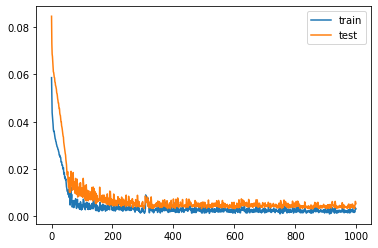

In [32]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
#model.add(LSTM(20, return_sequences=True))
#model.add(LSTM(20))
#model.add(LSTM(20, input_shape=(210,20), return_sequences=True))
#model.add(LSTM(200, input_shape=(210,20)))
model.add(Dense(1))

model.compile(loss='mae', optimizer='adam')
history = model.fit(X_train, Y_train, epochs=1000, batch_size=50,
         validation_data = (X_test, Y_test), verbose=2, shuffle=False)

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

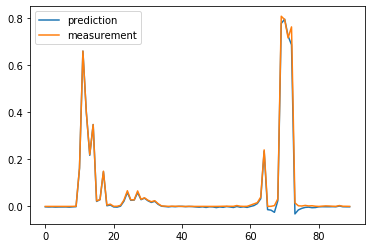

Test RMSE: 0.036
Test R2: 0.996
Test Nash Sutcliffe efficiency coefficient: 0.939


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
from random import randrange
import matplotlib.pyplot as plt

#scaler = MinMaxScaler(feature_range=(0, 1))
# make a prediction
yhat = model.predict(X_test)


pyplot.plot(yhat, label='prediction')
pyplot.plot(Y_test, label='measurement')
pyplot.legend()
pyplot.show()



test_X = X_test.reshape((X_test.shape[0], X_test.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
scaler = scaler.fit(inv_yhat)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = Y_test.reshape((len(Y_test), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
scaler = scaler.fit(inv_y)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))

#pyplot.plot(inv_yhat, label='prediction')
#pyplot.plot(inv_y, label='measurement')
#pyplot.legend()
#pyplot.show()
r2 = r2_score(yhat, Y_test)
print('Test RMSE: %.3f' % rmse)
print('Test R2: %.3f' % r2)

def NS(s,o):
    """
    Nash Sutcliffe efficiency coefficient
    input:
        s: simulated
        o: observed
    output:
        ns: Nash Sutcliffe efficient coefficient
    """
    #s,o = filter_nan(s,o)
    return 1 - np.sum((s-o)**2)/np.sum((o-np.mean(o))**2)
nsc = NS(inv_yhat, inv_y)
print ('Test Nash Sutcliffe efficiency coefficient: %.3f' % nsc)
